<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Import-modules/packages/libraries" data-toc-modified-id="Import-modules/packages/libraries-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Import modules/packages/libraries</a></span></li><li><span><a href="#Pre-processing" data-toc-modified-id="Pre-processing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Pre-processing</a></span><ul class="toc-item"><li><span><a href="#Data-augmentation-techniques" data-toc-modified-id="Data-augmentation-techniques-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Data augmentation techniques</a></span></li><li><span><a href="#Data-reshaping---resize-and-mirror" data-toc-modified-id="Data-reshaping---resize-and-mirror-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data reshaping - resize and mirror</a></span></li></ul></li><li><span><a href="#Save-image-data-to-hdf5" data-toc-modified-id="Save-image-data-to-hdf5-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Save image data to hdf5</a></span><ul class="toc-item"><li><span><a href="#Load-hdf5-file-for-testing" data-toc-modified-id="Load-hdf5-file-for-testing-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Load hdf5 file for testing</a></span></li></ul></li></ul></div>

## Introduction
In this notebook we store the fish images in a common data structure, more specifically in a hdf5 data format.

## Import modules/packages/libraries

In [1]:
import cv2
import os, sys
import matplotlib.pyplot as plt
import numpy as np
import random
import h5py

# Custom functonality
from utils.img_utils import reshape_img_to_square, list_images, augment_image_data, combine_data_to_hdf5
from utils.plot_utils import plot_random_images, plot_random_images_hdf5
from utils.fish_utils import fish_to_num_mapping, replace_norwegian_characters, map_fish
fish_mapping = fish_to_num_mapping()

In [2]:
%load_ext autoreload
%autoreload 2

## Pre-processing
Located in `..\data\`

In [3]:
images = list_images()

In [4]:
images

['Fiskebilder/Ferskvann/Abbor/Abbor01.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor02.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor03.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor04.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor05.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor06.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor07.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor08.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor09.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor10.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor100.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor101.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor11.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor12.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor13.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor14.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor15.jpeg',
 'Fiskebilder/Ferskvann/Abbor/Abbor16.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor17.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor18.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor19.jpg',
 'Fiskebilder/Ferskvann/Abbor/Abbor20.jpg',
 'Fiskebilder/Ferskvann/Abbor

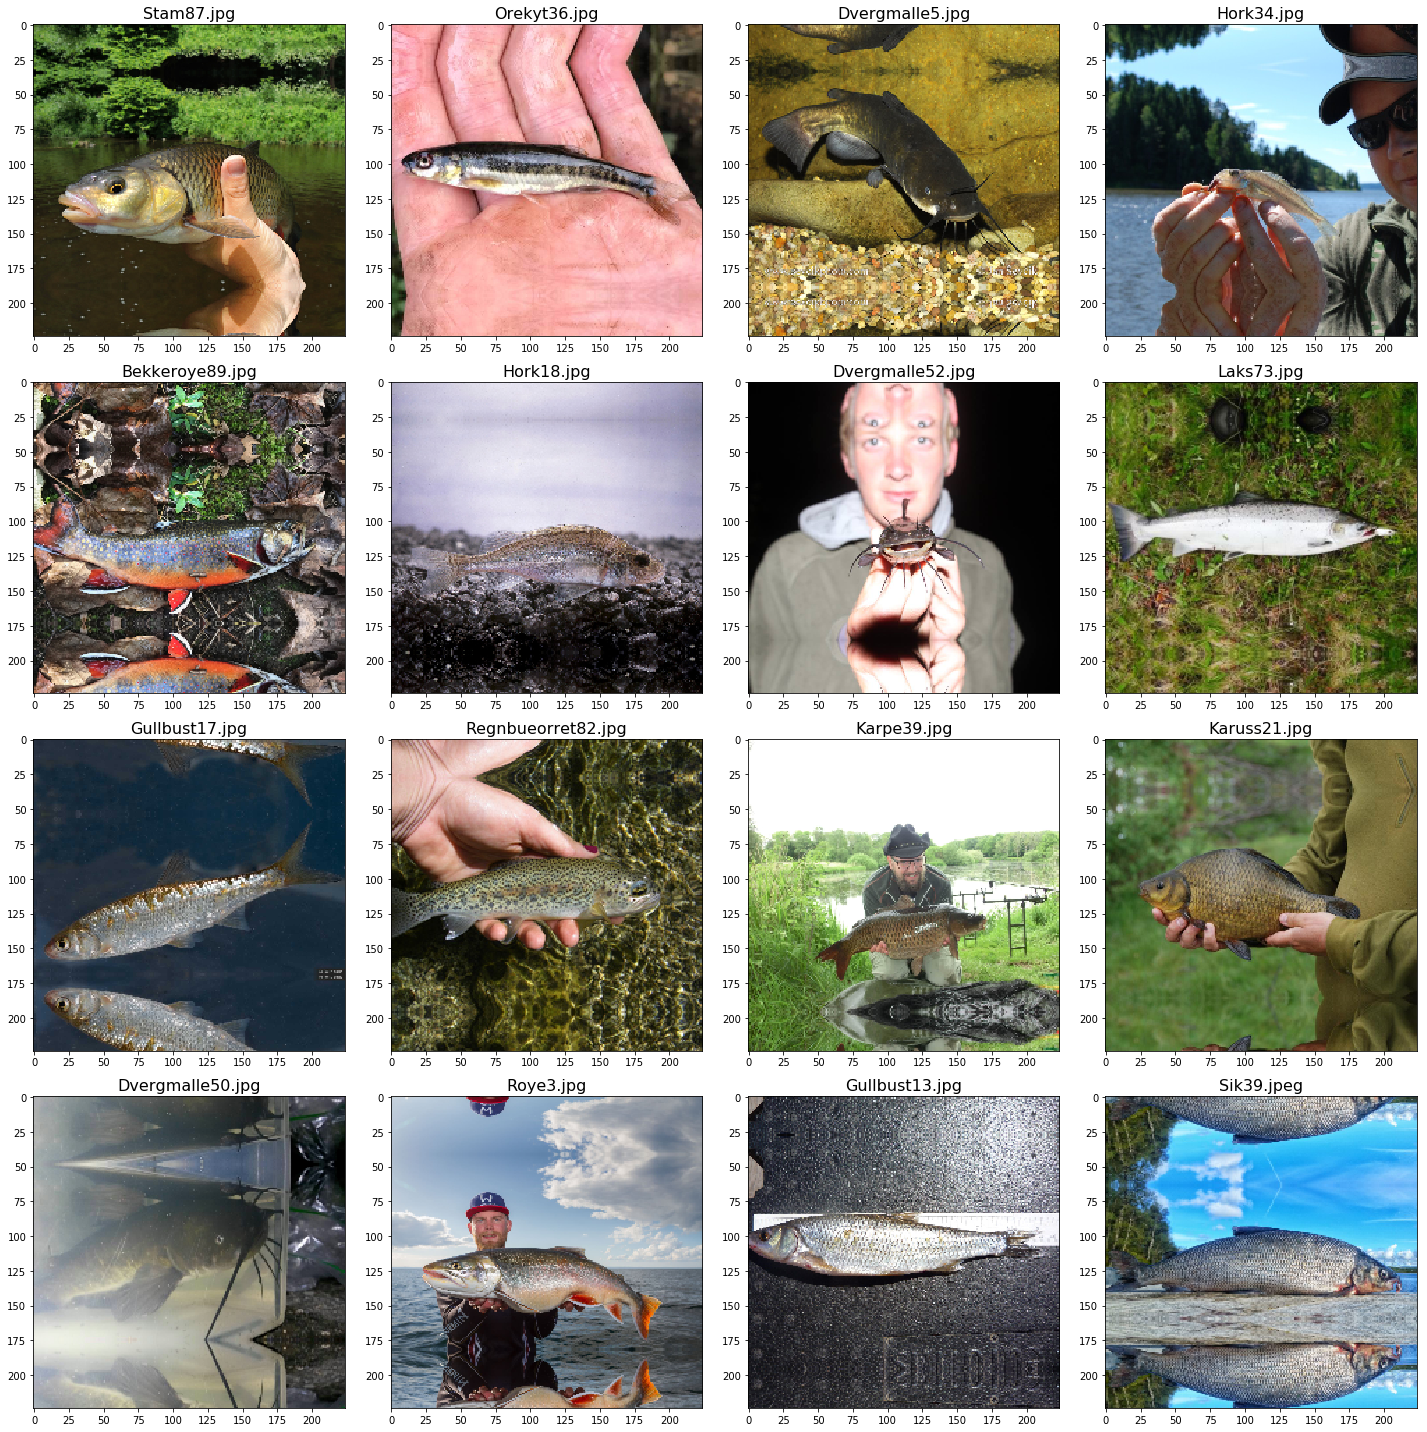

In [5]:
plot_random_images(images)

### Data augmentation techniques
See e.g. 
- [Data Augmentation | How to use Deep Learning when you have Limited Data — Part 2](https://medium.com/nanonets/how-to-use-deep-learning-when-you-have-limited-data-part-2-data-augmentation-c26971dc8ced)
- [Adding noise to images](https://theailearner.com/tag/cv2-randn/)

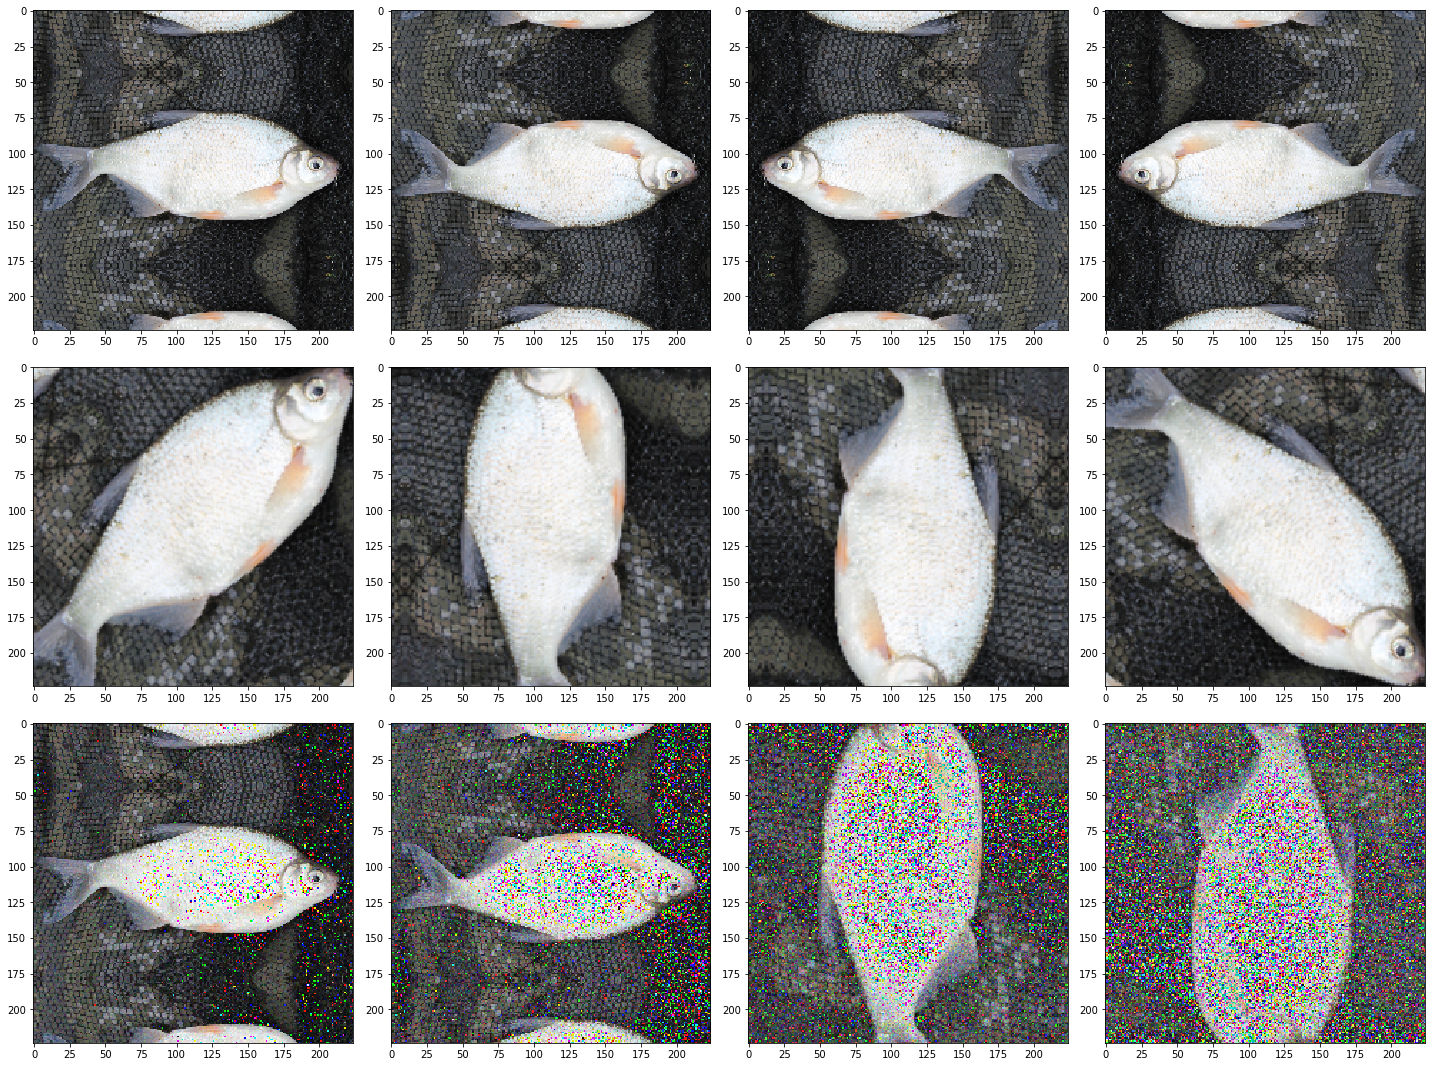

In [12]:
img_tit = images[random.randint(0,len(images))]
temp_img = cv2.imread(img_tit, cv2.IMREAD_UNCHANGED)
temp_img = cv2.cvtColor(temp_img, cv2.COLOR_BGR2RGB)    
temp_img = reshape_img_to_square(temp_img, plot_compressed=False)
augs = augment_image_data(temp_img)

### Data reshaping - resize and mirror

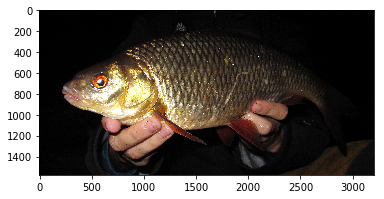

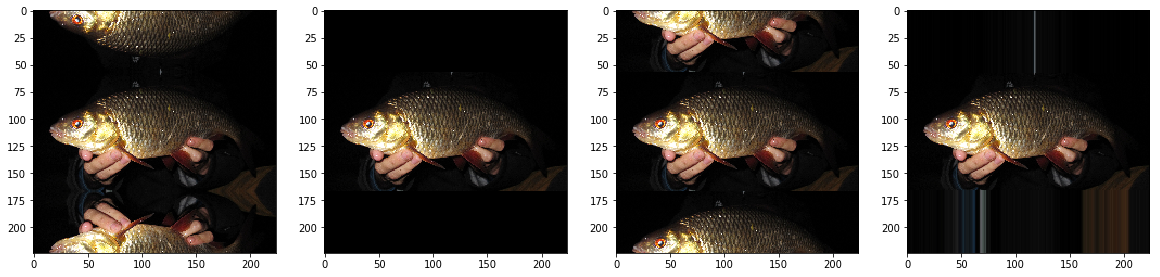

In [6]:
img_tit = images[random.randint(0,len(images))]
im = cv2.imread(img_tit, cv2.IMREAD_UNCHANGED)
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB) 

plt.figure()
plt.imshow(im)

desired_size = 224

old_size = im.shape[:2] # old_size is in (height, width) format

ratio = float(desired_size)/max(old_size)
new_size = tuple([int(x*ratio) for x in old_size])

# new_size should be in (width, height) format

im = cv2.resize(im, (new_size[1], new_size[0]))

delta_w = desired_size - new_size[1]
delta_h = desired_size - new_size[0]
top, bottom = delta_h//2, delta_h-(delta_h//2)
left, right = delta_w//2, delta_w-(delta_w//2)

fig, axes = plt.subplots(1, 4, figsize=(20, 15))
axes[0].imshow(cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_REFLECT))
axes[1].imshow(cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT))
axes[2].imshow(cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_WRAP))
axes[3].imshow(cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_REPLICATE))

## Save image data to hdf5

In [10]:
combine_data_to_hdf5('fish_training_fresh_noaug.hdf5', augment_data=False)

### Load hdf5 file for testing

In [11]:
hdf5_path = 'data/fish_training_fresh_noaug.hdf5'
train_dataset = h5py.File(hdf5_path, "r")
train_x = np.array(train_dataset["train_set"][:]) # your train set features
train_y = np.array(train_dataset["train_labels"][:]) # your train set targets

In [12]:
print(train_x.shape)
print(train_y.shape)

(2662, 224, 224, 3)
(2662, 1)


In [13]:
train_y

array([[b'Abbor'],
       [b'Abbor'],
       [b'Abbor'],
       ...,
       [b'Vederbuk'],
       [b'Vederbuk'],
       [b'Vederbuk']], dtype=object)

In [14]:
np.unique(train_y)

array([b'Abbor', b'Asp', b'Bekkeroye', b'Brasme', b'Dvergmalle', b'Flire',
       b'Gjedde', b'Gjors', b'Gullbust', b'Harr', b'Hork', b'Karpe',
       b'Karuss', b'Lake', b'Laks', b'Laue', b'Mort', b'Orekyt', b'Orret',
       b'Regnbueorret', b'Roye', b'Sik', b'Sorv', b'Stam', b'Steinsmett',
       b'Suter', b'Vederbuk'], dtype=object)

In [15]:
sum(train_y==b'Abbor')

array([101])

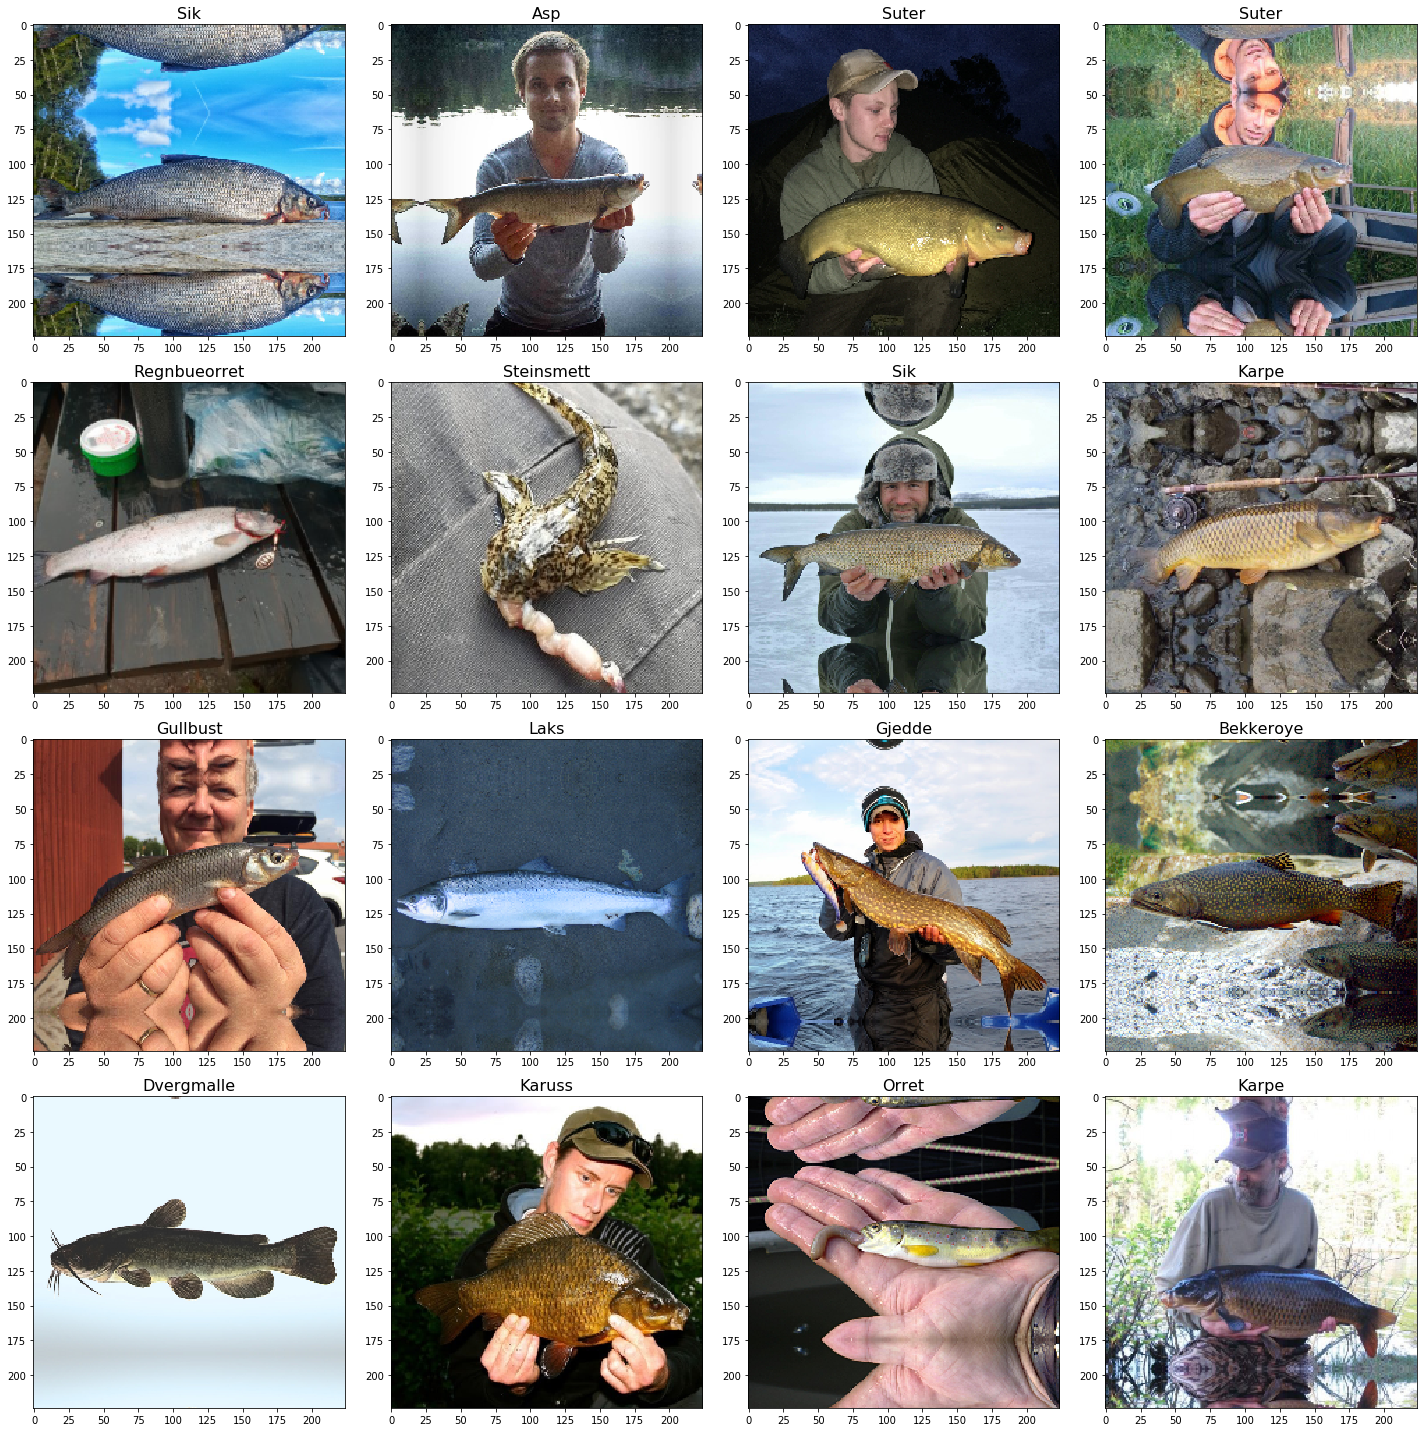

In [16]:
plot_random_images_hdf5(train_x, train_y)

In [8]:
fish_mapping

{'Aal': 0,
 'Abbor': 1,
 'Asp': 2,
 'Bekkeroye': 3,
 'Brasme': 4,
 'Canadaroye': 5,
 'Dvergmalle': 6,
 'Flire': 7,
 'Gjedde': 8,
 'Gjors': 9,
 'Gullbust': 10,
 'Gullfisk': 11,
 'Harr': 12,
 'Hork': 13,
 'Hornulke': 14,
 'Hvitfinnet steinulke': 15,
 'Karpe': 16,
 'Karuss': 17,
 'Ketalaks': 18,
 'Krokle': 19,
 'Lagesild': 20,
 'Lake': 21,
 'Laks': 22,
 'Laue': 23,
 'Maisild': 24,
 'Mort': 25,
 'Nipigget stingsild': 26,
 'Orekyt': 27,
 'Orret': 28,
 'Pukkellaks': 29,
 'Regnbueorret': 30,
 'Regnlaue': 31,
 'Rodgjellet solabbor': 32,
 'Roye': 33,
 'Sandkryper (grundling)': 34,
 'Sik': 35,
 'Sorv': 36,
 'Stam': 37,
 'Stamsild': 38,
 'Steinsmett': 39,
 'Suter': 40,
 'Trepigget stingsild': 41,
 'Vederbuk': 42,
 'Aalekvabbe': 43,
 'Arktisk knurrulke': 44,
 'Auxid': 45,
 'Berggylt': 46,
 'Bergkutling': 47,
 'Bergnebb': 48,
 'Berlevaagfisk': 49,
 'Blaahai': 50,
 'Blaakjeft': 51,
 'Blaakveite': 52,
 'Blaalange': 53,
 'Blaastaal': 54,
 'Blaasteinbit': 55,
 'Breiflabb': 56,
 'Brisling': 57,
 'Brosme